In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

region and date are object datatype

In [5]:
print('the number of rows and columns are :',df.shape)

the number of rows and columns are : (18249, 14)


# EDA AND VISAULIZATION

In [6]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no nan values in this dataset

In [8]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [9]:
#droping column unnamed
df=df.drop(['Unnamed: 0'],axis=1)

unnamed is not of any help for us to predict data

In [10]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

<AxesSubplot:xlabel='region', ylabel='count'>

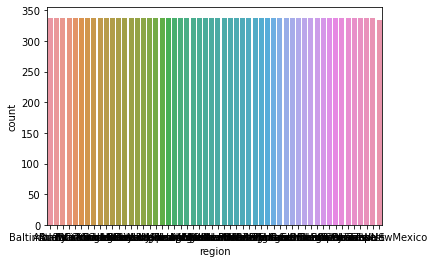

In [11]:
sns.countplot(df['region'])

In [12]:
df['region'].value_counts()

Tampa                  338
SouthCarolina          338
Indianapolis           338
SanDiego               338
PhoenixTucson          338
Chicago                338
Charlotte              338
Roanoke                338
Columbus               338
LosAngeles             338
Detroit                338
StLouis                338
NewOrleansMobile       338
Boston                 338
GrandRapids            338
West                   338
Jacksonville           338
Philadelphia           338
Boise                  338
Houston                338
Atlanta                338
GreatLakes             338
SanFrancisco           338
Syracuse               338
Portland               338
RichmondNorfolk        338
MiamiFtLauderdale      338
Pittsburgh             338
TotalUS                338
Northeast              338
Seattle                338
Spokane                338
Albany                 338
NorthernNewEngland     338
DallasFtWorth          338
LasVegas               338
HarrisburgScranton     338
O

Region column is 99.7% balanced so we can work with that

<AxesSubplot:xlabel='year', ylabel='Count'>

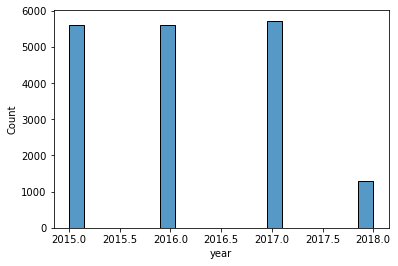

In [13]:
sns.histplot(df['year'])

the count is less in 2018

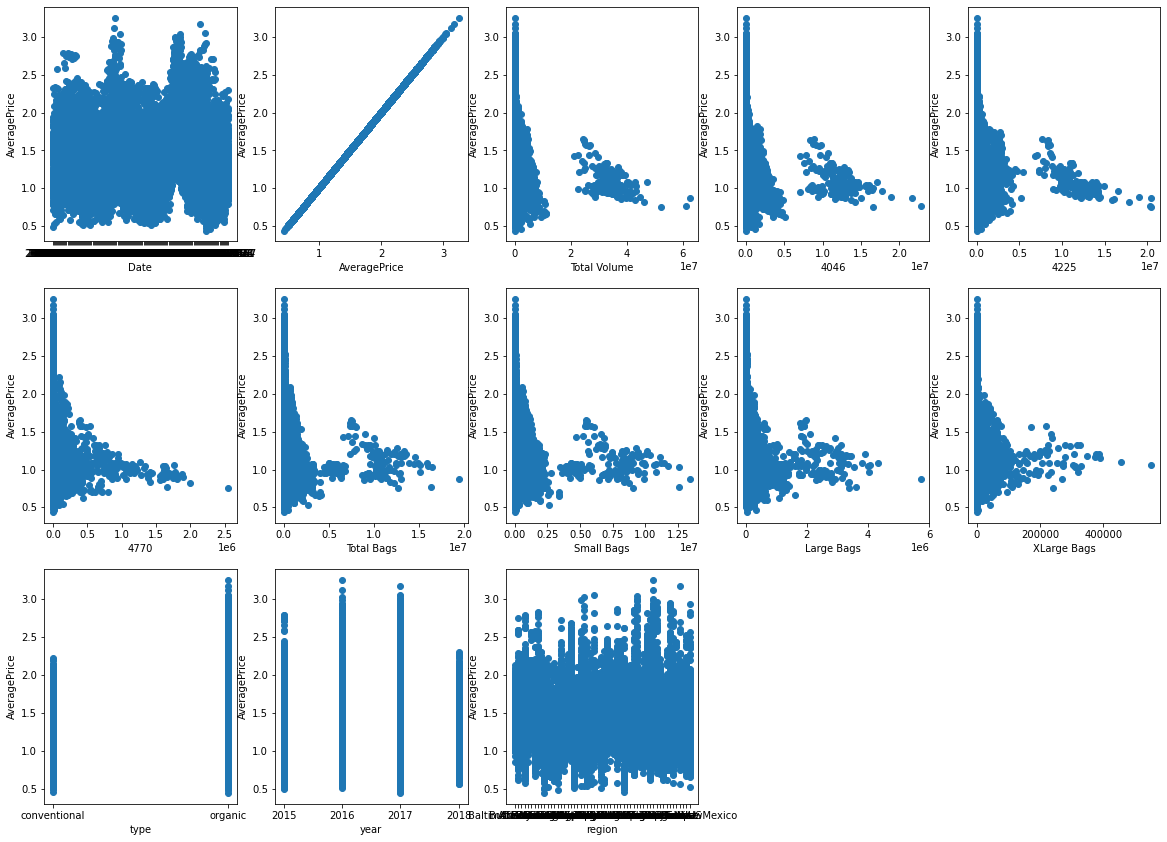

In [14]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(df[i],df['AveragePrice'])
        plt.xlabel(i,fontsize=10)
        plt.ylabel('AveragePrice',fontsize=10)
    plotnumber+=1
plt.show()

# According to year the amount of avocados produced can change hence their price

# what we see is that when there is less supply the prices are very high due to high demand

# type and year are not so correlated

In [15]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


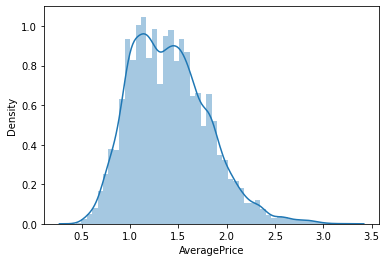

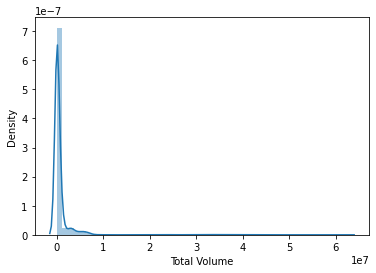

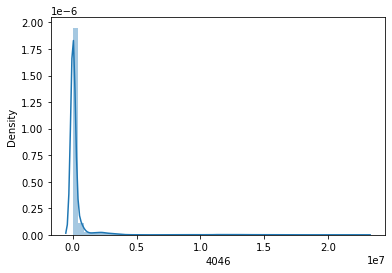

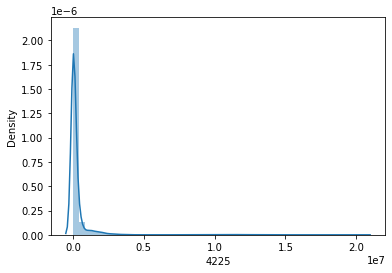

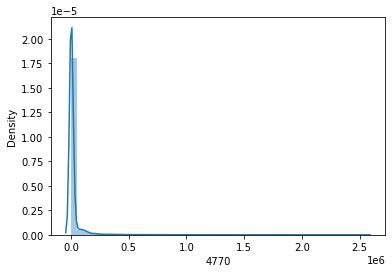

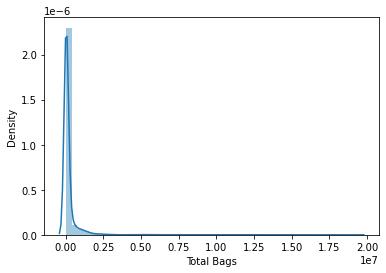

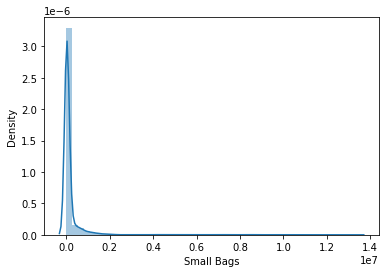

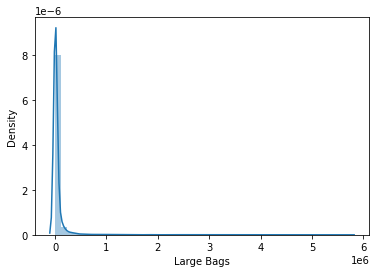

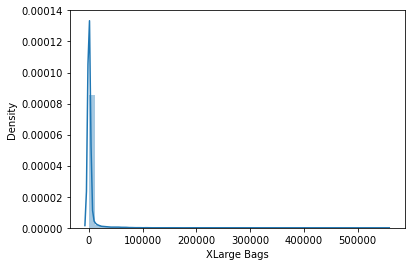

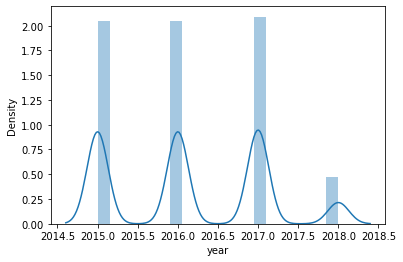

In [16]:
#checking if there is any skewness present in the data
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

we can see there is some skewness present in the data

<AxesSubplot:xlabel='year', ylabel='count'>

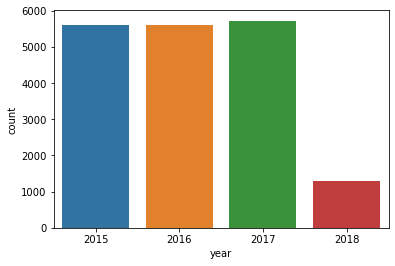

In [17]:
sns.countplot(df['year'])

2018 is the least balanced rest all are almost balanced

# encoding region column

In [18]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [19]:
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53


In [20]:
df['type']=le.fit_transform(df['type'])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


# type conventional = 0
# type organic = 1

# continue with EDA

<AxesSubplot:xlabel='region', ylabel='count'>

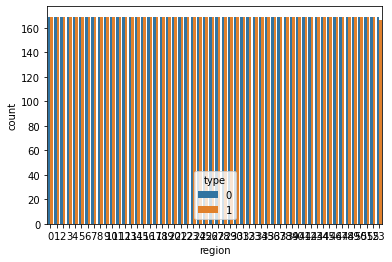

In [21]:
sns.countplot(x='region',hue='type',data=df)

every thing seems all balanced

# checking outliers

AveragePrice       AxesSubplot(0.125,0.657941;0.110714x0.222059)
Total Volume    AxesSubplot(0.257857,0.657941;0.110714x0.222059)
4046            AxesSubplot(0.390714,0.657941;0.110714x0.222059)
4225            AxesSubplot(0.523571,0.657941;0.110714x0.222059)
4770            AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Total Bags      AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Small Bags         AxesSubplot(0.125,0.391471;0.110714x0.222059)
Large Bags      AxesSubplot(0.257857,0.391471;0.110714x0.222059)
XLarge Bags     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
type            AxesSubplot(0.523571,0.391471;0.110714x0.222059)
year            AxesSubplot(0.656429,0.391471;0.110714x0.222059)
region          AxesSubplot(0.789286,0.391471;0.110714x0.222059)
dtype: object

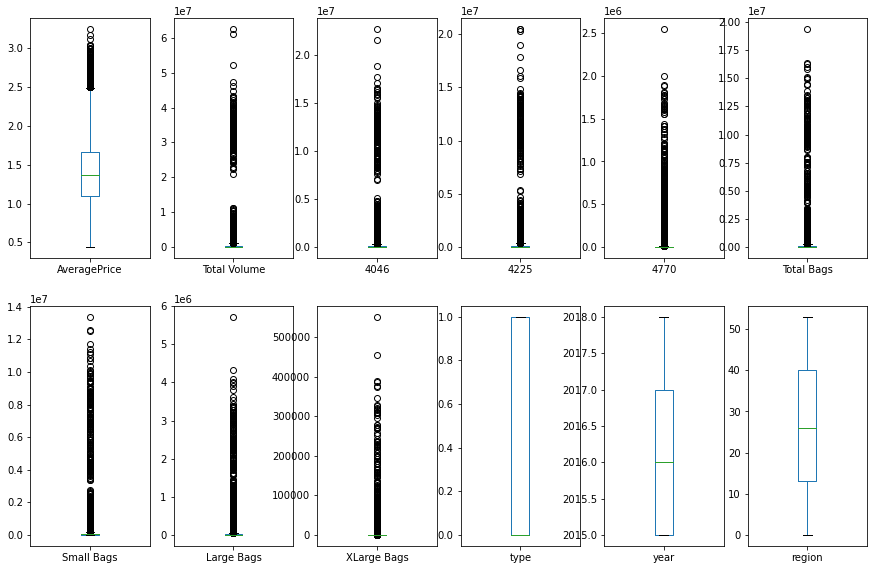

In [22]:
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(15,15))

we can see there are lot of outliers present in the data certainly more than 10% 

In [23]:
#droping column date as it only shows us the date of selling of avacados 
df=df.iloc[:,1:13]

In [24]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [25]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


<AxesSubplot:>

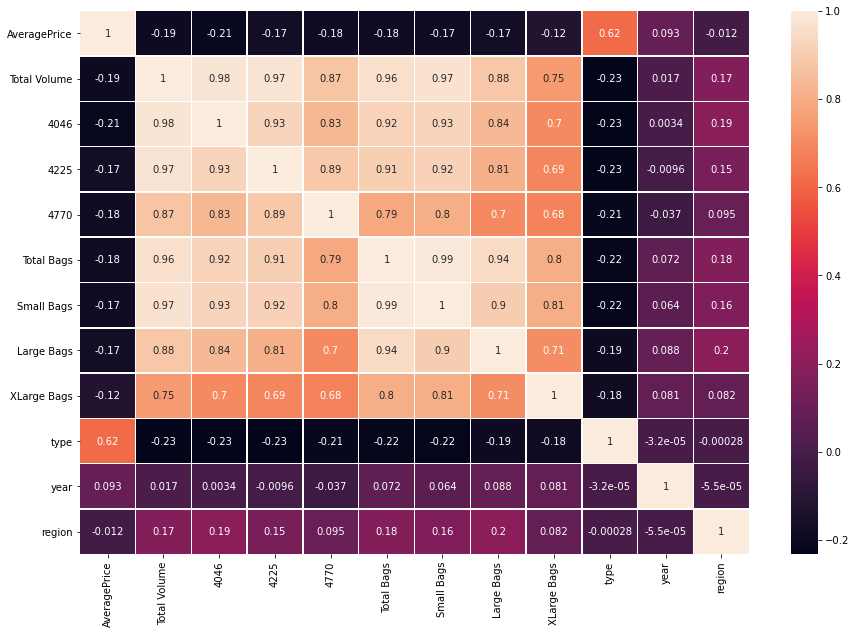

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=0.5,annot=True)

# type is highly correlated with average price and least is year

# year is very less correaleted with region 

# no need to remove any columns

# try to remove outliers

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [28]:
thresshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [29]:
df1=df[(z<3).all(axis=1)]
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [30]:
df.shape

(18249, 12)

In [31]:
df1.shape

(17651, 12)

In [32]:
data_loss=(18249-17651)/18249*100
data_loss

3.276891884486821

# there is only 3% data loss so we can move forward now after removing the outliers

In [33]:
x=df1.iloc[:,1:13]
y=df1.iloc[:,0]

In [34]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [35]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [36]:
x.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [37]:
#Reducing skewness of the data set
for i in x.columns:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [38]:
x.skew()

Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [39]:
x.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

# we removed the skewness now we will be using scaler to scale the data

In [40]:
sc=StandardScaler()
x[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region']]=sc.fit_transform(x[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region']])

In [41]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.061962,-0.587318,0.431565,-0.246207,-0.473426,-0.215789,-0.648254,-0.627319,-1.019047,-1.210013,-1.695495
1,-0.134302,-0.719464,0.359601,-0.199437,-0.431908,-0.179590,-0.636520,-0.627319,-1.019047,-1.210013,-1.695495
2,0.218235,-0.668997,0.683316,-0.001478,-0.504018,-0.243116,-0.621646,-0.627319,-1.019047,-1.210013,-1.695495
3,0.033021,-0.560308,0.532565,-0.145897,-0.661685,-0.384129,-0.552915,-0.627319,-1.019047,-1.210013,-1.695495
4,-0.167601,-0.616931,0.353051,-0.135308,-0.632653,-0.362677,-0.449388,-0.627319,-1.019047,-1.210013,-1.695495
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.670586,-0.378245,-0.861693,-1.215018,-0.268139,-0.046548,-0.241763,-0.627319,0.981309,1.980756,1.747054
18245,-0.765474,-0.544515,-0.569192,-1.215018,-0.443885,-0.200255,-0.317520,-0.627319,0.981309,1.980756,1.747054
18246,-0.769503,-0.544458,-0.690718,0.424488,-0.437415,-0.182019,-0.855591,-0.627319,0.981309,1.980756,1.747054
18247,-0.694596,-0.468195,-0.620126,0.424171,-0.365019,-0.119253,-0.812010,-0.627319,0.981309,1.980756,1.747054


In [42]:
#checking multicollinearity
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"]=x.columns
vif

,vif,Features
0,39.199582,Total Volume
1,5.731109,4046
2,7.943844,4225
3,3.932186,4770
4,21.843132,Total Bags
5,9.365492,Small Bags
6,2.652104,Large Bags
7,1.877491,XLarge Bags
8,3.468025,type
9,1.333469,year


In [43]:
for i in range(2,11):
    pc=PCA(n_components=i)
    principal_comp=pc.fit_transform(x)
    print(i,sum(pc.explained_variance_ratio_))

2 0.7037994179229847
3 0.7983248212967952
4 0.8536403023500149
5 0.9014440357029382
6 0.9284704143521514
7 0.953245612871778
8 0.9759090697679795
9 0.9939779926729768
10 0.9983813370689418


# NO need to use pca as there are only 10 columns and the good(>95%) data retention starts from 8 components

# model building

In [44]:
lr=LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

0.517248213690751

In [45]:
#making a list of the regression models which are to be tested with the data set
models=[GradientBoostingRegressor(),LinearRegression(),Ridge(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor()]

In [47]:
#making a for loop to check the models and their mean cross_val score with scoring set to r2
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 82,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('\n')

GradientBoostingRegressor()
score 0.6692048629899757
r2 0.6829854735987937
diff 0.013780610608817967


LinearRegression()
score 0.5124699254607108
r2 0.5354465002215221
diff 0.022976574760811275


Ridge()
score 0.5124716360941188
r2 0.5354403008912678
diff 0.022968664797148985


BayesianRidge()
score 0.5124727912880586
r2 0.5354205333303188
diff 0.022947742042260244


SGDRegressor()
score 0.5120106051320283
r2 0.5321596683126546
diff 0.02014906318062626


SVR()
score 0.7101671600472693
r2 0.7258873371977489
diff 0.015720177150479575


AdaBoostRegressor()
score 0.49116172290145244
r2 0.5181790595669783
diff 0.02701733666552586


KNeighborsRegressor()
score 0.805730918865781
r2 0.8239946625421211
diff 0.018263743676340094


RandomForestRegressor()
score 0.8297112269247183
r2 0.8474718739692458
diff 0.01776064704452751


BaggingRegressor()
score 0.809326970269419
r2 0.8226818955692861
diff 0.013354925299867038


DecisionTreeRegressor()
score 0.6554630599754357
r2 0.7150684739476173
diff 0

# we ran train test with cross validation scores and set scoring to r2 to check the mean cross_val when set to 5 



# we got more than 80% r2 score on RandomForestRegressor, KNeighborsRegressor, BaggingRegressor

# hypertuning parameters of the top models

Bagging regressor

In [ ]:
parameters={'n_estimators':[10,500],'max_features':[0.001,0.01,0.1,1.0]}
clf=GridSearchCV(BaggingRegressor(),parameters,cv=5,scoring='r2')
clf.fit(x,y)
clf.best_params_

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 76,test_size=0.20,shuffle=True)
br=BaggingRegressor(n_estimators=500,max_features=1.0)
br.fit(x_train,y_train)
y_pred=br.predict(x_test)
score=r2_score(y_test,y_pred)
print('r2_score :',score)

r2_score : 0.8424719128830097


Random forest regressor

In [ ]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestRegressor(), parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 76,test_size=0.20,shuffle=True)
rfr=RandomForestRegressor(n_estimators=500,criterion='mse',max_features='log2')
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
score=r2_score(y_test,y_pred)
print('r2_score :',score)

r2_score : 0.8468107369593859


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 60 ,test_size=0.20)
rfr=RandomForestRegressor()
rfr.fit(x,y)
y_pred=rfr.predict(x)
print("r2_score is:",r2_score(y,y_pred))

r2_score is: 0.979780788393753


# we will be saving Random Forest Regressor as our best performing regression model for this dataset when it comes to predicting average price.

In [52]:
#saving the regression model
joblib.dump(rfr,'ava_regressor.obj')

['ava_regressor.obj']

# now we move forward to classification

In [53]:
df1.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,0.091704,-0.003242
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,-0.004866,0.076676
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,-0.034636,0.119067
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,-0.040234,0.011002
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.082054,-0.095972
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.103442,0.085892
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.086639,0.065976
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.119543,0.127635
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,0.108209,-0.044338
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.003867,0.018409


In [54]:
x=df1.drop(['region'],axis=1)
y=df1['region']

In [55]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018


In [56]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

In [57]:
x.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'],
      dtype='object')

# Feature scaling the data for classification

In [58]:
#using standard scaler to scale the data
x[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year']]=sc.fit_transform(x[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year']])

In [59]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.195352,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.019047,-1.210013
1,-0.143510,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.019047,-1.210013
2,-1.232207,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.019047,-1.210013
3,-0.843387,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.019047,-1.210013
4,-0.324959,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.019047,-1.210013
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.582289,-0.438579,-0.347153,-0.411112,-0.323616,-0.412326,-0.381520,-0.375195,-0.259027,0.981309,1.980756
18245,0.789660,-0.441726,-0.349099,-0.406345,-0.323616,-0.427335,-0.399501,-0.376661,-0.259027,0.981309,1.980756
18246,1.204402,-0.441846,-0.349098,-0.408798,-0.302508,-0.426876,-0.397707,-0.380529,-0.259027,0.981309,1.980756
18247,1.359930,-0.439438,-0.348335,-0.407474,-0.302535,-0.421292,-0.390876,-0.380424,-0.259027,0.981309,1.980756


# building classification model

In [60]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier() 
svc=SVC()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()
rd=RidgeClassifier()
sgdc=SGDClassifier()

model=[lg,dtc,knn,rfc,svc,abc,gb,rd,sgdc]

In [73]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=45)
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    pred=m.predict(xtest)
    print('Accuracy score of ',m,'is :')
    print(accuracy_score(ytest,pred))
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))
    print('\n')

Accuracy score of  LogisticRegression() is :
0.4015859529878221
[[32  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  4 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  4  0]
 [ 0  0  0 ...  0 35  0]
 [ 0  4  0 ...  0  0 26]]
              precision    recall  f1-score   support

           0       0.41      0.44      0.42        73
           1       0.17      0.32      0.22        65
           2       0.72      0.50      0.59        68
           3       0.19      0.51      0.27        67
           4       0.46      0.47      0.47        57
           5       0.50      0.33      0.40        67
           6       0.78      0.53      0.63        55
           7       0.23      0.39      0.29        49
           8       0.70      0.38      0.49        56
           9       0.41      0.52      0.46        71
          10       0.39      0.20      0.27        54
          11       0.43      0.44      0.43        66
          12       0.59      0.33      0.42        58
          13       0.55

# we only have random forest classifier and with accuracy of more than 90% we will check the cross_val score and hypertune its parameters 

In [75]:
rfc=RandomForestClassifier()
gb=GradientBoostingClassifier()

In [76]:
#checking the cross val score for random forest which have the accuracy of 91%
scores=cross_val_score(rfc,x,y,cv=5)
print(scores)
print(scores.mean())

[0.62616822 0.81189802 0.75240793 0.69461756 0.49886686]
0.676791718514204


# hypertuning parameters

In [82]:
#Best parameters for  RandomForestClassifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,100,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)

{'max_features': 'log2', 'n_estimators': 100}


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 60 ,test_size=0.20)
rfc=RandomForestClassifier(max_features='log2',n_estimators=100)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9105069385443217


# testion on whole dataset

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 60 ,test_size=0.20)
rfc=RandomForestClassifier(max_features='log2',n_estimators=100)
rfc.fit(x,y)
y_pred=rfc.predict(x)
print(accuracy_score(y,y_pred))

1.0


# Random forest classifier is our best performing classifier model compared to all other models that we tested 

# we will save the model predicting regions 

In [63]:
joblib.dump(rfc,'ava_clasi.obj')

['ava_clasi.obj']

# for regression we saved random forest regressor as our best performing model with excellent r2 score

# for the classification problem we saved random forest classifier as it was the best performing model above all other